ans: [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
ans: [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


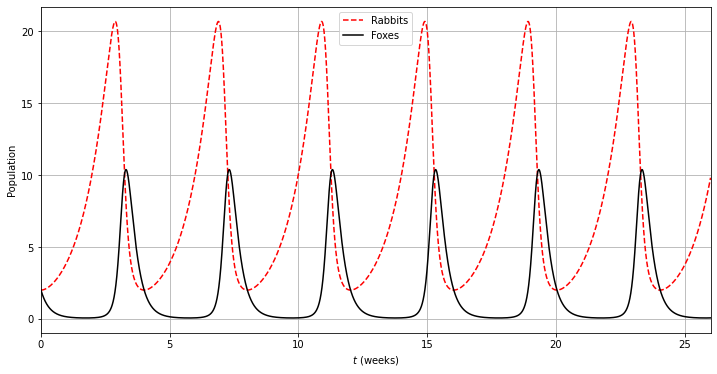

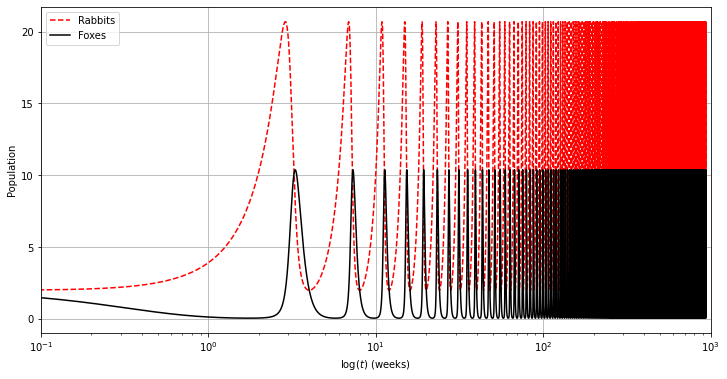

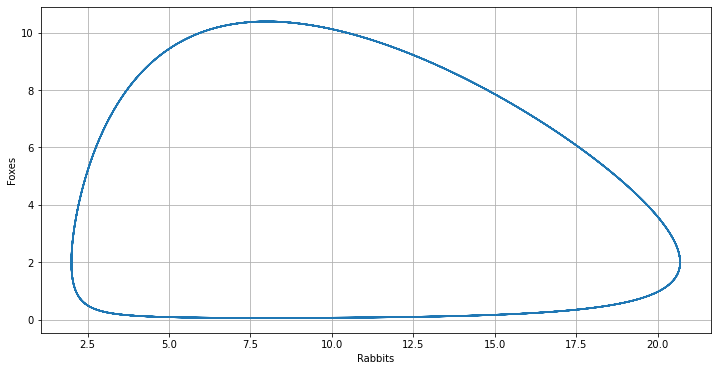

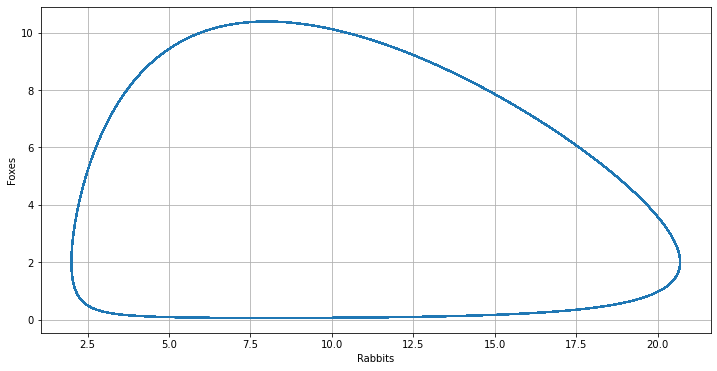

In [1]:
#1: Lokta-Volterra Predator-Prey differential equation

import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

#global paramters for the Lokta-Volterra equations

alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 4.0

def mainProg():
    
    
    
    #initial conditions#
    N10 = 2.0
    N20 = 2.0
        
    #final conditions#
    tfinal = 26.0 # 26 weeks 
    tfinal2 = 936.0 #18 years in weeks ( ~52 weeks in a year)
    
    Nt = 100000
    
    tspan = np.linspace(0,tfinal,Nt)
    t2span = np.linspace(0,938,Nt)
    
    r0 = [N10,N20] #array for initial conditions 
    
    solveRK4 = RK4(predPrey,r0,tspan) #solving 26 weeks 
    solveRK4next = RK4(predPrey,r0,t2span) #solving 18 years 
    
    
    # plotting #
    fig = plt.figure(figsize=(12,6))
    plt.plot(tspan,solveRK4[:,0],'--r',label='Rabbits')
    plt.plot(tspan,solveRK4[:,1], 'k', label='Foxes')
    plt.grid(True)
    plt.legend()
    plt.xlim(0,26)
    plt.xlabel("$t$ (weeks)")
    plt.ylabel('Population')
    fig.savefig('Rabbits_vs_Fox_26weeks.pdf',bbox_inches='tight')
    
    fig2 = plt.figure(figsize=(12,6))
    plt.semilogx(t2span,solveRK4next[:,0],'--r',label='Rabbits')
    plt.semilogx(t2span,solveRK4next[:,1], 'k', label='Foxes')
    plt.grid(True)
    plt.legend()
    plt.xlabel("log($t$) (weeks)")
    plt.xlim(10e-2,10e2)
    plt.ylabel('Population')
    fig2.savefig('Rabbits_vs_Fox_18years.pdf',bbox_inches='tight')
    
    #phase space: 
    fig3 = plt.figure(figsize=(12,6))
    plt.plot(solveRK4[:,0],solveRK4[:,1])
    plt.grid(True)
    plt.xlabel('Rabbits')
    plt.ylabel('Foxes')
    fig3.savefig('phasespace_26weeks.pdf',bbox_inches='tight')
   
    fig4 = plt.figure(figsize=(12,6))
    plt.plot(solveRK4next[:,0],solveRK4next[:,1])
    plt.grid(True)
    plt.xlabel('Rabbits')
    plt.ylabel('Foxes')
    fig4.savefig('phasespace_18years.pdf',bbox_inches='tight')
    
    plt.show()
    # end of plots
    
    
def predPrey(var,t): 
    
    N1,N2 = var
    dN1 = alpha*N1 - beta*N1*N2
    dN2 = gamma*N1*N2 - delta*N2
    
    return np.array([dN1,dN2])
    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t)
    ans = np.empty([nt,len(r0)])
    print('ans:',ans)
    ans[0] = r0 
    
    for i in range(0, nt-1):
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans

if __name__=='__main__':
    mainProg()

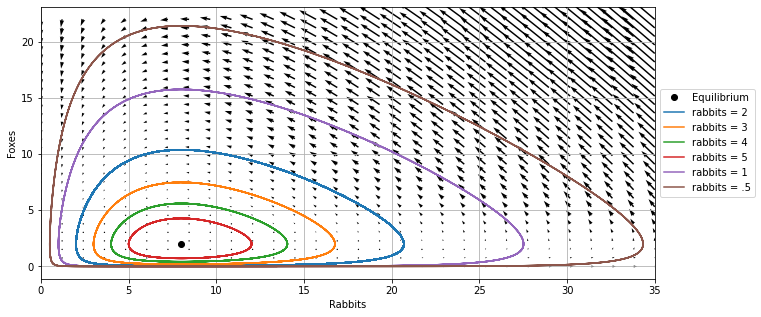

In [108]:
#1: Lokta-Volterra Predator-Prey differential equation

import numpy as np
import matplotlib.pyplot as plt

#global paramters for the Lokta-Volterra equations

alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 4.0

def mainProg():
    
    
    
    #initial conditions#
    N10 = 2.0
    N20 = 2.0
    
    N110 = 3.0
    N111 = 4.0
    N222 = 5.0
    N333 = 1.0
    N444 = 0.5
    
        
    #final conditions#
    tfinal = 26.0 # 26 weeks 
    tfinal2 = 936.0 #18 years in weeks ( ~52 weeks in a year)
    
    Nt = 100000
    
    x, y = np.meshgrid( np.linspace(0,35,30), np.linspace(0,22,30) )
    
    dotx = alpha*x-beta*x*y
    doty = gamma*x*y - delta*y
    
    
    tspan = np.linspace(0,tfinal,Nt)
    t2span = np.linspace(0,938,Nt)
    
    
    
    r0 = [N10,N20] #array for initial conditions 
    
    r01 = [N110,N20]
    r02 = [N111,N20]
    r03 = [N222,N20]
    r04 = [N333,N20]
    r05 = [N444,N20]
    
    solveRK4 = RK4(predPrey,r0,tspan) #solving 26 weeks 
    solveRK4next = RK4(predPrey,r0,t2span) #solving 18 years 
    
    
    #new initial conditions#
    
    solveRK4new = RK4(predPrey,r01,tspan)
    solveRK4new2 = RK4(predPrey,r02,tspan)
    solveRK4new3 = RK4(predPrey,r03,tspan)
    solveRK4new4 = RK4(predPrey,r04,tspan)
    solveRK4new5 = RK4(predPrey,r05,tspan)
    
    x1 = [8]
    y1 = [2]
    
    fig = plt.figure(figsize=(11,5))
    plt.quiver(x,y,dotx,doty)
    plt.plot(x1,y1,'ko',label='Equilibrium')
    plt.plot(solveRK4next[:,0],solveRK4next[:,1],label='rabbits = 2')
    plt.plot(solveRK4new[:,0],solveRK4new[:,1],label='rabbits = 3')
    plt.plot(solveRK4new2[:,0],solveRK4new2[:,1],label='rabbits = 4')
    plt.plot(solveRK4new3[:,0],solveRK4new3[:,1],label='rabbits = 5')
    plt.plot(solveRK4new4[:,0],solveRK4new4[:,1],label='rabbits = 1')
    plt.plot(solveRK4new5[:,0],solveRK4new5[:,1],label='rabbits = .5')
    plt.xlabel('Rabbits')
    plt.ylabel('Foxes')
    plt.xlim(0,35)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
   
    plt.show()
    fig.savefig('stabilityPhaseSpace.pdf',bbox_inches='tight')
    # end of plots
    
    
def predPrey(var,t): 
    
    x,y = var
    dx = alpha*x - beta*x*y
    dy = gamma*x*y - delta*y
    
    return np.array([dx,dy])
    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t)
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    
    for i in range(0, nt-1):
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans

if __name__=='__main__':
    mainProg()

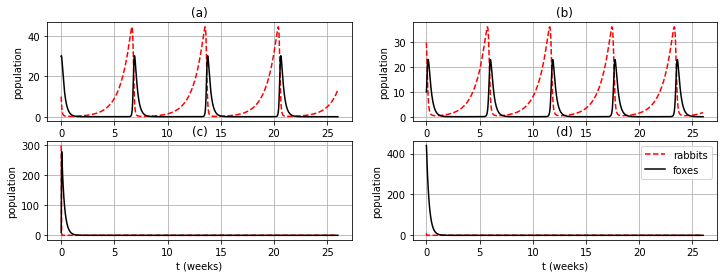

In [147]:
#part (b) for Lokta-Volterra equations studying the stability by changing the initial conditions


import numpy as np
import matplotlib.pyplot as plt

#global paramters for the Lokta-Volterra equations

alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 4.0

def mainProg():
    
    
    
    #initial conditions#
    N10 = 10.0
    N20 = 30.0
    
    n10_2 = 30.0
    n20_2 = 10.0
    
    n10_3 = 300.0
    n20_3 = 10.0
    
    n10_4 = 10.0
    n20_4 = 440.0
        
    #final conditions#
    tfinal = 26.0 # 26 weeks 
    tfinal2 = 932.0 #18 years in weeks ( ~52 weeks in a year)
    
    Nt = 10000 
    t = np.linspace(0,tfinal,Nt)
    t2 = np.linspace(0,tfinal2,Nt)
    r0 = [N10,N20] #array for initial conditions 
    r0_2 = [n10_2,n20_2]
    r0_3 = [n10_3,n20_3]
    r0_4 = [n10_4,n20_4]
    
    solveRK4_1 = RK4(predPrey,r0,t) #solving 26 weeks 
    solveRK4_2 = RK4(predPrey,r0_2,t)
    solveRK4_3 = RK4(predPrey,r0_3,t)
    solveRK4_4 = RK4(predPrey,r0_4,t)
    
    solveRK4next = RK4(predPrey,r0,t) #solving 18 years 
    
    
    
    # plotting #
    fig,axes = plt.subplots(2,2,figsize=(12,4))
#    axes[0,0].plot(t,RK4(predPrey,r0,t))
#    axes[0,1].plot(t,RK4(predPrey,r0_2,t))
#    axes[1,0].plot(t,RK4(predPrey,r0_3,t))
#    axes[1,1].plot(t,RK4(predPrey,r0_4,t))
    axes[0,0].plot(t,solveRK4_1[:,0],'--r')
    axes[0,0].plot(t,solveRK4_1[:,1],'k')
    axes[0,0].set_title('(a)')
    axes[0,1].plot(t,solveRK4_2[:,0],'--r')
    axes[0,1].plot(t,solveRK4_2[:,1],'k')
    axes[0,1].set_title('(b)')
    axes[1,0].plot(t,solveRK4_3[:,0],'--r')
    axes[1,0].plot(t,solveRK4_3[:,1],'k')
    axes[1,0].set_title('(c)')
    axes[1,1].plot(t,solveRK4_4[:,0],'--r',label='rabbits')
    axes[1,1].plot(t,solveRK4_4[:,1],'k',label='foxes')
    axes[1,1].set_title('(d)')
    plt.legend()
    
    
    for ax in axes.flat:
        ax.set(xlabel='t (weeks)', ylabel='population')
        ax.grid(True)
    
    #for ax in axes.flat:
     #   ax.label_outer()
     #   ax.grid(True)
    # end of plots
    
    fig.savefig('predPrey_assymptotic.pdf',bbox_inches='tight')
    
def predPrey(var,t):
    
    N1,N2 = var #reduction of order 
    
    dN1 = alpha*N1 - beta*N1*N2
    dN2 = gamma*N1*N2 - delta*N2
    
    return np.array([dN1,dN2])
    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) #1000 grid points 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): #1000 grid points
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans

if __name__=='__main__':
    mainProg()

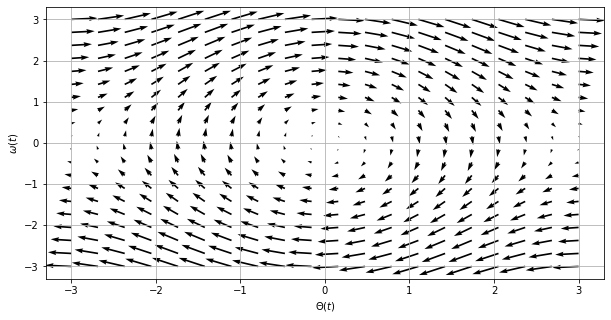

In [4]:
# problem 2: phase space and Liouville's Theorem


#2a - make phase space plot of thetadot and omegadot
import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    theta, omega = np.meshgrid( np.linspace(-3,3,20), np.linspace(-3,3,20) )
    
    thetadot = omega
    omegadot = -np.sin(theta)
    
    fig = plt.figure(figsize=(10,5))
    plt.quiver(theta,omega,thetadot,omegadot)
    plt.xlabel('$\Theta(t)$')
    plt.ylabel('$\omega(t)$')
    plt.grid(True)
    plt.show()
    
    fig.savefig('vectorfield_om_theta.pdf',bbox_inches='tight')
    

if __name__=='__main__':
    mainProg()

r0: [[ 0.  -3. ]
 [ 0.  -2.5]
 [ 0.  -2. ]
 [ 0.  -1.5]
 [ 0.  -1. ]
 [ 0.  -0.5]
 [ 0.   0. ]
 [ 0.   0.5]
 [ 0.   1. ]
 [ 0.   1.5]
 [ 0.   2. ]
 [ 0.   2.5]
 [ 0.   3. ]]


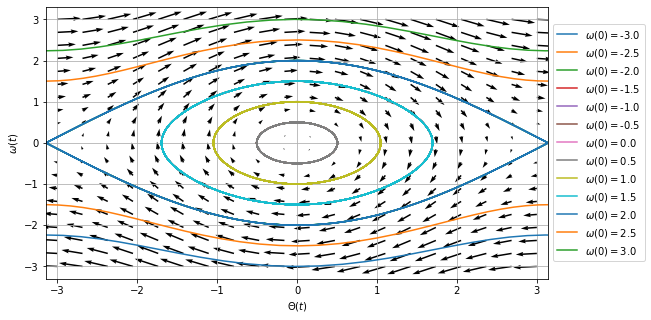

In [5]:
# problem 2: phase space and Liouville's Theorem


#2b
import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    theta, omega = np.meshgrid( np.linspace(-3,3,20), np.linspace(-3,3,20) )
    
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,100,1000)
    
    theta0 = np.linspace(-3,3,10)
    omega0 = np.arange(-3,3.1,.5)
    
    ometostr = [str(x) for x in omega0] #put this here to transform to string for legends in plot
    
    r0 = np.empty([len(omega0),2])
    #r0 = np.zeros([len(omega0),2])
    #easily could have done r0 = np.zeros([len(omega0),2])
    #fill out first column with zeros
    
    for i in range(len(omega0)):
        r0[i,0] = 0.0
        r0[i,1] = omega0[i]
        
    print('r0:',r0)
    solveRK4 = RK4(func,r0,tspan)

    
    fig = plt.figure(figsize=(9,5))
    plt.quiver(theta,omega,thetadot,omegadot)
    for i in range(13):
        a = solveRK4[i]
        #this ensures that the boundaries are wrapped
        #np.max says that at each initial condition, if the max value is less than 2pi
        # oscillations will be guaranteed. Absolute value because we want everything to be positive 
        # basically taking the negative values and wrapping them to the other side. 
        # If there theta values that are greater than 2pi, this means that a rotation occurs.
        if (np.max(abs(a[:,0])) <= 2*np.pi):
            plt.plot(a[:,0],a[:,1],label='$\omega(0)=$'+ometostr[i])
        else:
            plt.plot((abs(a[:,0]))-2*np.pi,a[0:,1],label='$\omega(0)=$'+ometostr[i])
            
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlim([-np.pi,np.pi])
    plt.xlabel('$\Theta(t)$')
    plt.ylabel('$\omega(t)$')
    plt.grid(True)
    plt.show()
    
    fig.savefig('phasespace_omega_theta_wrapping.pdf',bbox_inches='tight')
    
def func(var,t): 
    
    theta,omega = var
    dtheta = omega
    domega = -np.sin(theta)
    
    return np.array([dtheta,domega])
    
def RK4(f,z0,t):
    dt = t[1] - t[0] #step size
    nt = len(t)
    
    holdvals = []
    
    for j in range(13):
        ans = np.zeros([nt,2]) #zero in first column and fill out different omega for 2nd column
        ans[0,1] = z0[j,1]
    
        for i in range(0, nt-1):
            k1 = f( ans[i],t[i] )
            k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
            k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
            k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
            ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
            
        holdvals.append(ans)
    
        
#    print(holdvals)   
        
    return holdvals

if __name__=='__main__':
    mainProg()

r0: [[ 0.  -3. ]
 [ 0.  -2.5]
 [ 0.  -2. ]
 [ 0.  -1.5]
 [ 0.  -1. ]
 [ 0.  -0.5]
 [ 0.   0. ]
 [ 0.   0.5]
 [ 0.   1. ]
 [ 0.   1.5]
 [ 0.   2. ]
 [ 0.   2.5]
 [ 0.   3. ]]
[[  0.           3.        ]
 [  0.29980068   2.98509447]
 [  0.59666645   2.94183973]
 ...
 [259.98726076   2.35731788]
 [260.22005656   2.29703255]
 [260.44778721   2.25649294]]


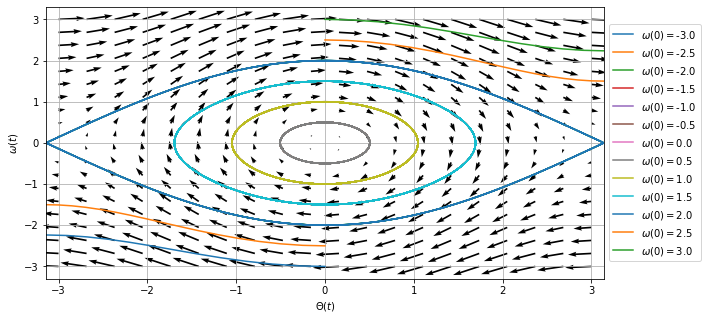

In [6]:
# problem 2: phase space and Liouville's Theorem


#2b
import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    theta, omega = np.meshgrid( np.linspace(-3,3,20), np.linspace(-3,3,20) )
    
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,100,1000)
    
    #theta0 = np.arange(-3,3.1,.5)
    theta0 = np.linspace(0,0,13)
    omega0 = np.arange(-3,3.1,.5)
    
    omegastr = [str(x) for x in omega0] #use thisfor labeling the legend later 
    
    
    r0 = np.empty([len(omega0),2])
    #r0 = np.zeros([len(omega0),2])
    #easily could have done r0 = np.zeros([len(omega0),2])
    #fill out first column with zeros
    
    #for i in range(len(omega0)):
    #    r0[i,0] = 0.0
    #    r0[i,1] = omega0[i]
    
    for i in range(len(omega0)):
        r0[i,0] = theta0[i]
        r0[i,1] = omega0[i]
        
    print('r0:',r0)
    solveRK4 = RK4(func,r0,tspan)

    
    fig = plt.figure(figsize=(10,5))
    plt.quiver(theta,omega,thetadot,omegadot)
    for i in range(13):
        answer = solveRK4[i]
        #this ensures that the boundaries are wrapped
        #np.max says that at each initial condition, if the max value is less than 2pi
        # oscillations will be guaranteed. Absolute value because we want everything to be positive 
        # basically taking the negative values and wrapping them to the other side. 
        # If there theta values that are greater than 2pi, this means that a rotation occurs.
        #if (np.max(abs(a[:,0])) <= 2*np.pi):
        #   plt.plot(a[:,0],a[:,1])
        #else:
            #plt.plot((abs(a[:,0]))-2*np.pi,a[0:,1] )
        
        plt.plot(answer[:,0],answer[:,1],label='$\omega(0)=$'+omegastr[i])

        


    # Put a legend to the right of the current axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Put a legend to the right of the current axis
    #plt.legend()
    plt.xlim([-np.pi,np.pi])
    plt.grid(True)
    plt.xlabel('$\Theta(t)$')
    plt.ylabel('$\omega(t)$')
    plt.show()
    
    fig.savefig('phasespace_omega_theta_nowrap.pdf',bbox_inches='tight')
    
def func(var,t): 
    
    theta,omega = var
    dtheta = omega
    domega = -np.sin(theta)
    
    return np.array([dtheta,domega])
    
def RK4(f,z0,t):
    dt = t[1] - t[0] #step size
    nt = len(t)
    
    holdvals = [] #holding the answers 
    
    for j in range(13):
        ans = np.empty([nt,2]) #zero in first column and fill out different omega for 2nd column
        ans[0,1] = z0[j,1]
        ans[0,0] = z0[j,0]
        
    
    
        for i in range(0, nt-1):
            k1 = f( ans[i],t[i] )
            k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
            k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
            k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
            ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
            
        holdvals.append(ans)
    
    print(ans)    
#    print(holdvals)   
        
    return holdvals

if __name__=='__main__':
    mainProg()

r0: [[ 0.  -3. ]
 [ 0.  -2.5]
 [ 0.  -2. ]
 [ 0.  -1.5]
 [ 0.  -1. ]
 [ 0.  -0.5]
 [ 0.   0. ]
 [ 0.   0.5]
 [ 0.   1. ]
 [ 0.   1.5]
 [ 0.   2. ]
 [ 0.   2.5]
 [ 0.   3. ]]


No handles with labels found to put in legend.


[[  0.           3.        ]
 [  0.29980068   2.98509447]
 [  0.59666645   2.94183973]
 ...
 [259.98726076   2.35731788]
 [260.22005656   2.29703255]
 [260.44778721   2.25649294]]


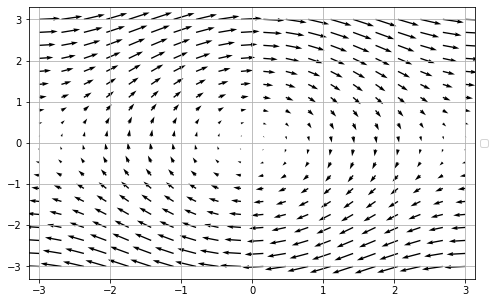

In [22]:
# problem 2: phase space and Liouville's Theorem


#2b
import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    theta, omega = np.meshgrid( np.linspace(-3,3,20), np.linspace(-3,3,20) )
    
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,100,1000)
    
    #theta0 = np.arange(-3,3.1,.5)
    theta0 = np.linspace(0,0,13)
    omega0 = np.arange(-3,3.1,.5)
    
    omegastr = [str(x) for x in omega0] #use thisfor labeling the legend later 
    
    
    r0 = np.empty([len(omega0),2])
    #r0 = np.zeros([len(omega0),2])
    #easily could have done r0 = np.zeros([len(omega0),2])
    #fill out first column with zeros
    
    #for i in range(len(omega0)):
    #    r0[i,0] = 0.0
    #    r0[i,1] = omega0[i]
    
    for i in range(len(omega0)):
        r0[i,0] = theta0[i]
        r0[i,1] = omega0[i]
        
    print('r0:',r0)
    solveRK4 = RK4(func,r0,tspan)

    
    fig = plt.figure(figsize=(8,5))
    plt.quiver(theta,omega,thetadot,omegadot)
    for i in range(13):
        answer = solveRK4[i]
        #this ensures that the boundaries are wrapped
        #np.max says that at each initial condition, if the max value is less than 2pi
        # oscillations will be guaranteed. Absolute value because we want everything to be positive 
        # basically taking the negative values and wrapping them to the other side. 
        # If there theta values that are greater than 2pi, this means that a rotation occurs.
        #if (np.max(abs(a[:,0])) <= 2*np.pi):
        #    plt.plot(a[:,0],a[:,1])
        #else:
        #    plt.plot((abs(a[:,0]))-2*np.pi,a[0:,1] )
        
        #if (np.max(abs(answer[:,0]))%(2*np.pi) ):
        #    plt.plot(answer[:,0],answer[:,1])
        #else:
        #    plt.plot((abs(answer[:,0])),answer[0:,1] )
        
        #plt.plot(answer[:,0],answer[:,1],label='$\omega(0)=$'+omegastr[i])

        


    # Put a legend to the right of the current axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # Put a legend to the right of the current axis
    #plt.legend()
    plt.xlim([-np.pi,np.pi])
    plt.grid(True)
    plt.show()
    
def func(var,t): 
    
    theta,omega = var
    dtheta = omega
    domega = -np.sin(theta)
    
    return np.array([dtheta,domega])
    
def RK4(f,z0,t):
    dt = t[1] - t[0] #step size
    nt = len(t)
    
    holdvals = [] #holding the answers 
    
    for j in range(13):
        ans = np.empty([nt,2]) #zero in first column and fill out different omega for 2nd column
        ans[0,1] = z0[j,1]
        ans[0,0] = z0[j,0]
        
    
    
        for i in range(0, nt-1):
            k1 = f( ans[i],t[i] )
            k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
            k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
            k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
            ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
            
        holdvals.append(ans)
    
    print(ans)    
#    print(holdvals)   
        
    return holdvals

if __name__=='__main__':
    mainProg()

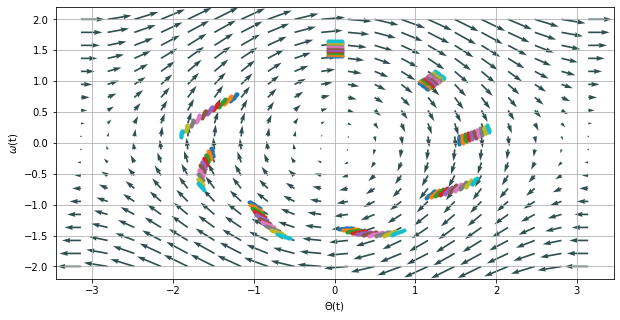

In [7]:
# problem 2: phase space and Liouville's Theorem


#2c
import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    theta, omega = np.meshgrid( np.linspace((-np.pi),(np.pi),20), np.linspace(-2,2,20) )
    
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,2.0*np.pi,8)
    
    theta0 = np.linspace(-(5*np.pi/180),(5*np.pi/180),10)
    omega0 = np.linspace(1.4,1.65,10)
    
    r = np.empty([100,2])
    
    n = 0
    for i in range(len(theta0)):
        for j in range(len(omega0)):
            r[n,0] = theta0[i] 
            r[n,1] = omega0[j] 
            
            n = n+1
                

    solveRK4 = RK4(func,r,tspan)
    fig = plt.figure(figsize=(10,5))
    plt.quiver(theta,omega,thetadot,omegadot,color='darkslategray')
    for i in range(100):
        a = solveRK4[i]
        
        #if (np.max(abs(a[:,0])) <= 2*np.pi):
        #    plt.plot(a[:,0],a[:,1],marker='.',lw=0)
        #else:
        #    plt.plot((abs(a[:,0]))-2*np.pi,a[0:,1],marker='.',lw=0)
        
        plt.plot(a[:,0],a[:,1],'.')

    plt.grid(True)
    plt.xlabel('$\Theta$(t)')
    plt.ylabel('$\omega$(t)')
    plt.show()
    fig.savefig('Liouville1.pdf',bbox_inches='tight')
    
    
    
def func(var,t): 
    
    theta,omega = var
    dtheta = omega
    domega = -np.sin(theta)
    
    return np.array([dtheta,domega])
    
def RK4(f,z0,t):
    dt = t[1] - t[0] #step size
    nt = len(t)
    
    holdvals = [] #holding the answers 
    
    for j in range(100):
        ans = np.empty([nt,2]) #zero in first column and fill out different omega for 2nd column
        ans[0,1] = z0[j,1]
        ans[0,0] = z0[j,0]
         
        for i in range(0, nt-1):
            k1 = f( ans[i],t[i] )
            k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
            k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
            k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
            ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
            
        holdvals.append(ans)
    
#    print(holdvals)   
        
    return holdvals

if __name__=='__main__':
    mainProg()

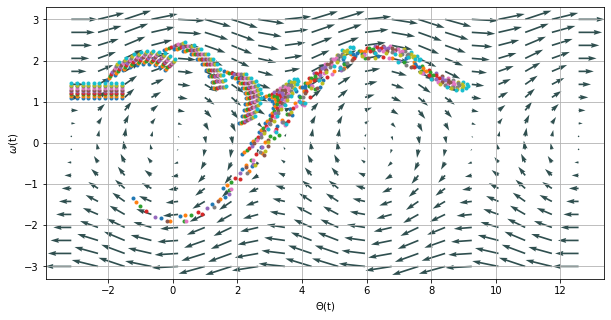

In [8]:
# problem 2: phase space and Liouville's Theorem


#2c
import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    theta, omega = np.meshgrid( np.linspace(-np.pi,4*np.pi,20), np.linspace(-3,3,20) )
    
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,2.0*np.pi,8)
    
    theta0 = np.linspace((-np.pi),(-np.pi/2),10)
    omega0 = np.linspace(1.1,1.45,10)
    
    r = np.empty([100,2])
    
    n = 0
    for i in range(len(theta0)):
        for j in range(len(omega0)):
            r[n,0] = theta0[i] 
            r[n,1] = omega0[j] 
            
            n = n+1
                

    solveRK4 = RK4(func,r,tspan)
    fig = plt.figure(figsize=(10,5))
    plt.quiver(theta,omega,thetadot,omegadot,color='darkslategray')
    for i in range(100):
        a = solveRK4[i]
        
     #   if (np.max(abs(a[:,0])) <= 2*np.pi):
      #      plt.plot(a[:,0],a[:,1],marker='.',lw=0)
      #  else:
       #     plt.plot((abs(a[:,0]))-2*np.pi,a[0:,1],marker='.',lw=0)
        
        plt.plot(a[:,0],a[:,1],'.')
        
    plt.grid(True)
    #plt.xlim(-np.pi/2,np.pi/2)
    plt.xlabel('$\Theta$(t)')
    plt.ylabel('$\omega$(t)')
    plt.show()
    fig.savefig('Liouville_Seperatrix.pdf',bbox_inches='tight')
    
    
    
def func(var,t): 
    
    theta,omega = var
    dtheta = omega
    domega = -np.sin(theta)
    
    return np.array([dtheta,domega])
    
def RK4(f,z0,t):
    dt = t[1] - t[0] #step size
    nt = len(t)
    
    holdvals = [] #holding the answers 
    
    for j in range(100):
        ans = np.empty([nt,2]) #zero in first column and fill out different omega for 2nd column
        ans[0,1] = z0[j,1]
        ans[0,0] = z0[j,0]
         
        for i in range(0, nt-1):
            k1 = f( ans[i],t[i] )
            k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
            k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
            k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
            ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
            
        holdvals.append(ans)
    
#    print(holdvals)   
        
    return holdvals

if __name__=='__main__':
    mainProg()

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def mainProg():
    
    theta, omega = np.meshgrid( np.linspace((-np.pi),(np.pi),20), np.linspace(-2,2,20) )
    
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,2.0*np.pi,8)
    
    theta0 = np.linspace(-(5*np.pi/180),(5*np.pi/180),10)
    omega0 = np.linspace(1.4,1.65,10)
    
    r = np.empty([100,2])
    
    n = 0
    for i in range(len(theta0)):
        for j in range(len(omega0)):
            r[n,0] = theta0[i] 
            r[n,1] = omega0[j] 
            
            n = n+1
                

    solveRK4 = RK4(func,r,tspan)
    fig = plt.figure(figsize=(10,5))
    plt.quiver(theta,omega,thetadot,omegadot,color='darkslategray')
    for i in range(100):
        a = solveRK4[i]
        
        #if (np.max(abs(a[:,0])) <= 2*np.pi):
        #    plt.plot(a[:,0],a[:,1],marker='.',lw=0)
        #else:
        #    plt.plot((abs(a[:,0]))-2*np.pi,a[0:,1],marker='.',lw=0)
        
        plt.plot(a[:,0],a[:,1],'.')

    plt.grid(True)
    plt.xlabel('$\Theta$(t)')
    plt.ylabel('$\omega$(t)')
    plt.show()
    fig.savefig('Liouville1.pdf',bbox_inches='tight')
    
    
    
def func(var,t): 
    
    theta,omega = var
    dtheta = omega
    domega = -np.sin(theta)
    
    return np.array([dtheta,domega])
    
def RK4(f,z0,t):
    dt = t[1] - t[0] #step size
    nt = len(t)
    
    holdvals = [] #holding the answers 
    
    for j in range(100):
        ans = np.empty([nt,2]) #zero in first column and fill out different omega for 2nd column
        ans[0,1] = z0[j,1]
        ans[0,0] = z0[j,0]
         
        for i in range(0, nt-1):
            k1 = f( ans[i],t[i] )
            k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
            k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
            k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
            ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
            
        holdvals.append(ans)
    
#    print(holdvals)   
        
    return holdvals


def init():
    line.set_data([],[])
    time_text.set_text('')
    return line, time_text

def animate(i):
    xs = [sol[:,0,i]]
    ys = [sol[:,1,i]]
    
    line.set_data(xs,ys)
    time_text.set_text(time_template % t[i])
    
    return line, time_text




if __name__=='__main__':
    mainProg()


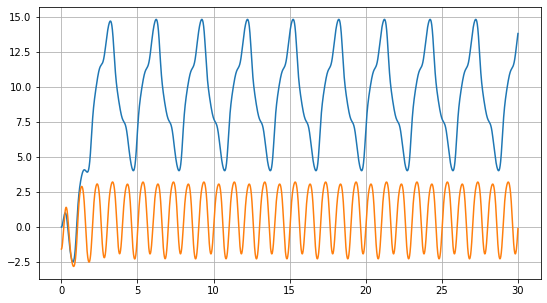

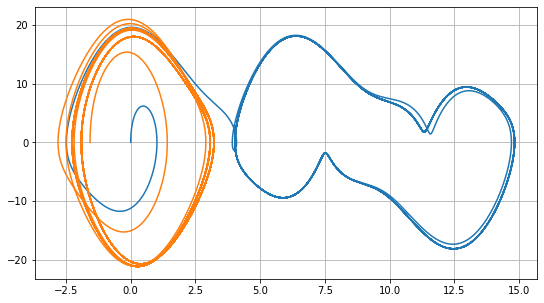

In [12]:
#problem 3
import numpy as np 
import matplotlib.pyplot as plt


Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.077



import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    theta, omega = np.meshgrid( np.linspace(-3,3,20), np.linspace(-3,3,20) )
    
    tf = 30.0
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,tf,10000)
    
    
    theta01 = 0.0
    omega01 = 0.0
    
    theta02 = -(np.pi/2)
    omega02 = 0.0
    
#    r0 = np.empty([len(omega0),2])
    r01 = [theta01,omega01]
    r02 = [theta02,omega02]
    #r0 = np.zeros([len(omega0),2])
    #easily could have done r0 = np.zeros([len(omega0),2])
    #fill out first column with zeros
    
#    for i in range(len(omega0)):
#        r0[i,0] = 0.0
#        r0[i,1] = omega0[i]
        
    
    
    solveRK4 = RK4(func,r01,tspan)
    solveRK4next = RK4(func,r02,tspan)

    
    fig = plt.figure(figsize=(9,5))

    plt.plot(tspan,solveRK4[:,0])
    plt.plot(tspan,solveRK4next[:,0])
    plt.grid(True)
    
    
    fig2 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[:,0],solveRK4[:,1])
    plt.plot(solveRK4next[:,0],solveRK4next[:,1])
    plt.grid(True)
    
    
#    fig,axes = plt.subplots(2,2,figsize=(10,5))

#    axes[0,0].plot(tspan,solveRK4[:,0],'--r')
#    axes[0,0].plot(tspan,solveRK4next[:,1],'k')
#    axes[0,1].plot(solveRK4[:,0],solveRK4[:,1],'--r')
#    axes[0,1].plot(solveRK4next[:,0],solveRK4next[:,1],'k')
    
    plt.show()
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): #1000 grid points
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    
#def RK4(f,z0,t):
#    dt = t[1] - t[0] #step size
#    nt = len(t)
    
#    holdvals = []
    
#    for j in range(13):
#        ans = np.zeros([nt,2]) #zero in first column and fill out different omega for 2nd column
#        ans[0,1] = z0[j,1]
    
#        for i in range(0, nt-1):
#            k1 = f( ans[i],t[i] )
#            k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
#            k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
#            k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
#            ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
            
#        holdvals.append(ans)
    
        
#    print(holdvals)   
        
#    return holdvals

if __name__=='__main__':
    mainProg()

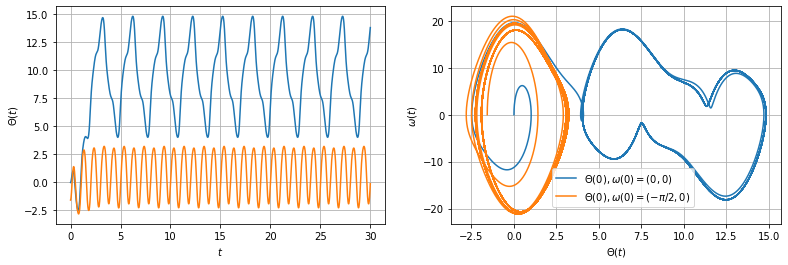

In [29]:
#problem 3
import numpy as np 
import matplotlib.pyplot as plt


Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.077



import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    theta, omega = np.meshgrid( np.linspace(-3,3,20), np.linspace(-3,3,20) )
    
    tf = 30.0
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,tf,300000)
    
    
    theta01 = 0.0
    omega01 = 0.0
    
    theta02 = -(np.pi/2)
    omega02 = 0.0
    
#    r0 = np.empty([len(omega0),2])
    r01 = [theta01,omega01]
    r02 = [theta02,omega02]
    #r0 = np.zeros([len(omega0),2])
    #easily could have done r0 = np.zeros([len(omega0),2])
    #fill out first column with zeros
    
#    for i in range(len(omega0)):
#        r0[i,0] = 0.0
#        r0[i,1] = omega0[i]
        
    
    
    solveRK4 = RK4(func,r01,tspan)
    solveRK4next = RK4(func,r02,tspan)

    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
    
    ax1.plot(tspan,solveRK4[:,0],label='$\Theta(0),\omega(0)=(0,0)$')
    ax1.plot(tspan,solveRK4next[:,0],label='$\Theta(0),\omega(0)=(-\pi/2,0)$')
    ax1.grid(True)
    ax1.set_xlabel('$t$')
    ax1.set_ylabel('$\Theta(t)$')
    
    ax2.plot(solveRK4[:,0],solveRK4[:,1])
    ax2.plot(solveRK4next[:,0],solveRK4next[:,1])
    ax2.grid(True)
    ax2.set_xlabel('$\Theta(t)$')
    ax2.set_ylabel('$\omega(t)$')
    
    
    

    fig.legend(loc='center left', bbox_to_anchor=(0.65, 0.25))
    plt.show()
    
    fig.savefig('chaosDrivenPendulum.pdf',bbox_inches='tight')
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): #1000 grid points
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

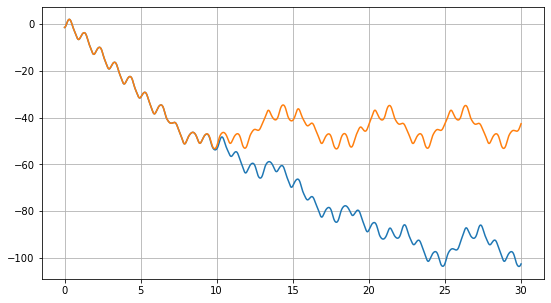

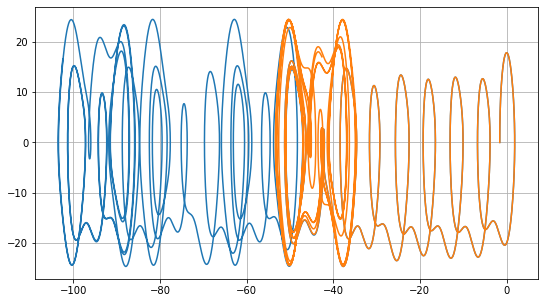

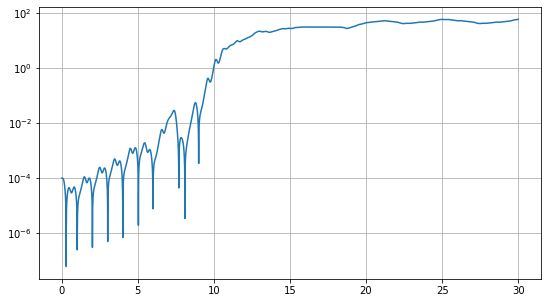

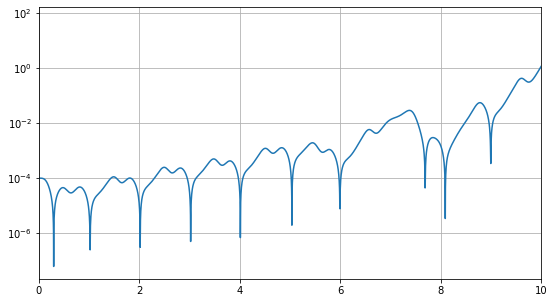

In [459]:
import numpy as np 
import matplotlib.pyplot as plt


Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.503


import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    
    tf = 30.0

    tspan = np.linspace(0,tf,10000)
    
    
    theta01 = -np.pi/2.0
    omega01 = 0.0
    
    theta02 = (-np.pi/2.0)+0.0001
    omega02 = 0.0
    
    r01 = [theta01,omega01]
    r02 = [theta02,omega02]
    
    
    
    solveRK4 = RK4(func,r01,tspan)
    solveRK4next = RK4(func,r02,tspan)

    
    fig = plt.figure(figsize=(9,5))

    plt.plot(tspan,solveRK4[:,0],label='$\Theta(t)$')
    plt.plot(tspan,solveRK4next[:,0],label='$\omega(t)$')
    plt.grid(True)
    
    
    fig2 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[:,0],solveRK4[:,1])
    plt.plot(solveRK4next[:,0],solveRK4next[:,1])
    plt.grid(True)
    
    
    fig3 = plt.figure(figsize=(9,5))
    plt.semilogy(tspan,abs( solveRK4[:,0]-solveRK4next[:,0] ) )
    plt.grid(True)
    
    
    fig4 = plt.figure(figsize=(9,5))
    plt.semilogy(tspan,abs( solveRK4[:,0]-solveRK4next[:,0] ) )
    plt.grid(True)
    plt.xlim(0,10)
    
    plt.show()
    
    
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): 
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

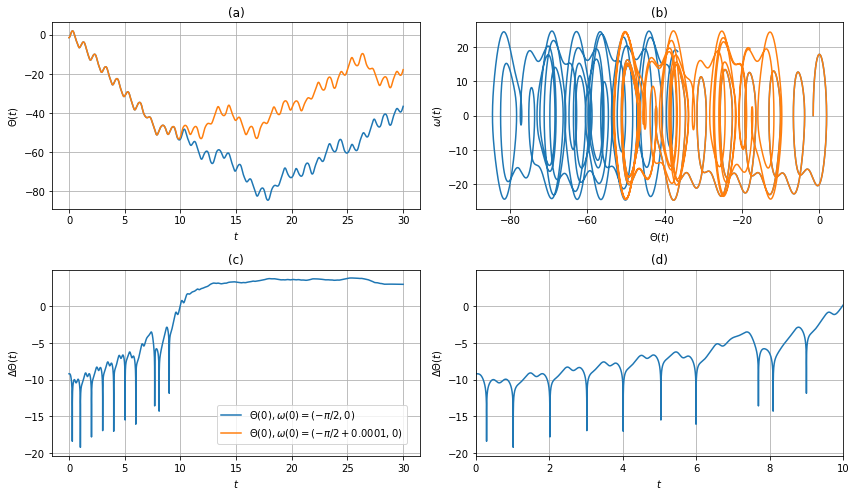

In [12]:
import numpy as np 
import matplotlib.pyplot as plt


Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.503


import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    
    tf = 30.0

    tspan = np.linspace(0,tf,300000)
    
    
    theta01 = -np.pi/2.0
    omega01 = 0.0
    
    theta02 = (-np.pi/2.0)+0.0001
    omega02 = 0.0
    
    r01 = [theta01,omega01]
    r02 = [theta02,omega02]
    
    
    
    solveRK4 = RK4(func,r01,tspan)
    solveRK4next = RK4(func,r02,tspan)

    
    fig,axes = plt.subplots(2,2,figsize=(12,7))
  
    
    axes[0,0].plot(tspan,solveRK4[:,0],label='$\Theta(0),\omega(0)=(-\pi/2,0)$')
    axes[0,0].plot(tspan,solveRK4next[:,0],label='$\Theta(0),\omega(0)=(-\pi/2+0.0001,0)$')
    axes[0,0].set_xlabel('$t$')
    axes[0,0].set_ylabel('$\Theta(t)$')
    axes[0,0].grid(True)
    axes[0,0].set_title('(a)')
    
    axes[0,1].plot(solveRK4[:,0],solveRK4[:,1])
    axes[0,1].plot(solveRK4next[:,0],solveRK4next[:,1])
    axes[0,1].set_xlabel('$\Theta(t)$')
    axes[0,1].set_ylabel('$\omega(t)$')
    axes[0,1].grid(True)
    axes[0,1].set_title('(b)')
    
    axes[1,0].plot(tspan,np.log(abs(solveRK4[:,0] - solveRK4next[:,0])) )
    axes[1,0].set_xlabel('$t$')
    axes[1,0].set_ylabel('$\Delta\Theta(t)$')
    axes[1,0].grid(True)
    axes[1,0].set_title('(c)')
    
    axes[1,1].plot(tspan,np.log(abs(solveRK4[:,0] - solveRK4next[:,0])) )
    axes[1,1].set_xlabel('$t$')
    axes[1,1].set_ylabel('$\Delta\Theta(t)$')
    axes[1,1].set_xlim(0,10)
    axes[1,1].grid(True)
    axes[1,1].set_title('(d)')
    
    

    fig.tight_layout()
 
    fig.legend(loc='center left', bbox_to_anchor=(0.25, 0.15))
    plt.show()
    
    fig.savefig('Lyapunov.pdf',bbox_inches='tight')
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): 
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

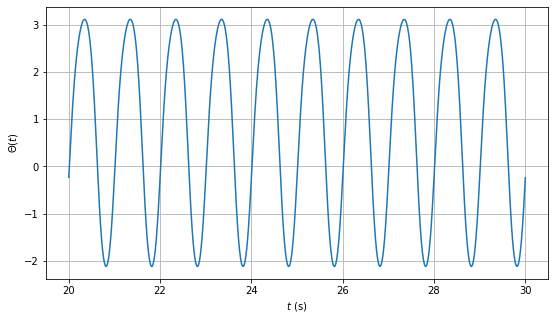

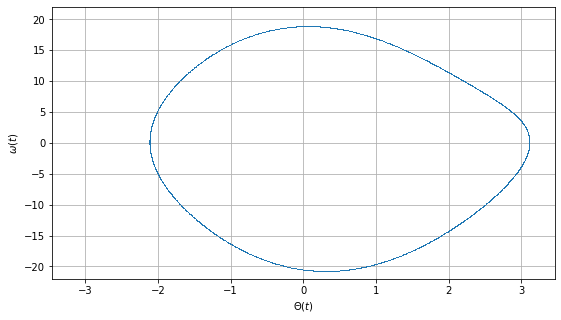

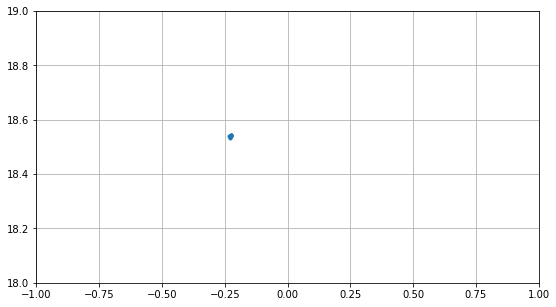

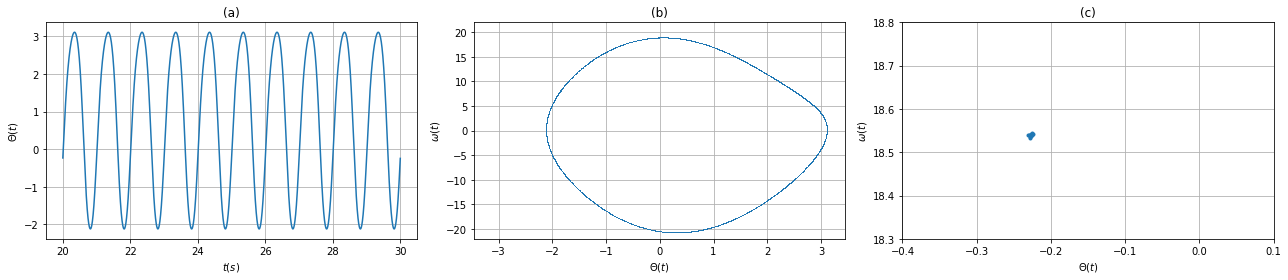

In [30]:
Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.061

import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    
    tf = 30.0

    tspan = np.linspace(0,tf,30000)
    
    
    theta0 = -np.pi/2.0
    omega0 = 0.0

    
    r0 = [theta0,omega0]    
    
    
    solveRK4 = RK4(func,r0,tspan)

    for i in range(len(solveRK4[:,0])):
        while ( solveRK4[i,0] > np.pi):
               solveRK4[i,0] = solveRK4[i,0] - (2.0*np.pi)
        while ((solveRK4[i,0]) < -np.pi):
               solveRK4[i,0] = solveRK4[i,0] + (2.0*np.pi)

    
#    fig = plt.figure(figsize=(9,5))
#    plt.plot(solveRK4[:,0],solveRK4[:,1],',')
#    plt.grid(True)
    
    fig1 = plt.figure(figsize=(9,5))
    plt.plot(tspan[20000:],solveRK4[20000:,0])
    plt.xlabel('$t$ (s)')
    plt.ylabel('$\Theta(t)$')
    plt.grid(True)
    
    fig2 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    plt.xlabel('$\Theta(t)$')
    plt.ylabel('$\omega(t)$')
    plt.xlim((-1.1*np.pi),1.1*np.pi)
    plt.ylim(-22,22)
    plt.grid(True)
    
    
    fig3 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    plt.xlim(-1,1)
    plt.ylim(18,19)
    plt.grid(True)
 
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
    
    ax1.plot(tspan[20000:],solveRK4[20000:,0])
    ax1.grid(True)
    ax1.set_xlabel('$t(s)$')
    ax1.set_ylabel('$\Theta(t)$')
    ax1.set_title('(a)')
    
    ax2.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    ax2.set_xlabel('$\Theta(t)$')
    ax2.set_ylabel('$\omega(t)$')
    ax2.set_xlim((-1.1*np.pi),1.1*np.pi)
    ax2.set_ylim(-22,22)
    ax2.grid(True)
    ax2.set_title('(b)')
    
    ax3.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    ax3.set_xlabel('$\Theta(t)$')
    ax3.set_ylabel('$\omega(t)$')
    ax3.set_xlim(-0.4,0.1)
    ax3.set_ylim(18.3,18.8)
    ax3.grid(True)
    ax3.set_title('(c)')

    
    fig.tight_layout()
    plt.show()
    
    fig.savefig('Gamma_1061.pdf',bbox_inches='tight')
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): 
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

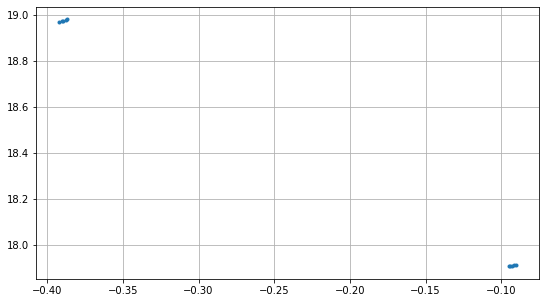

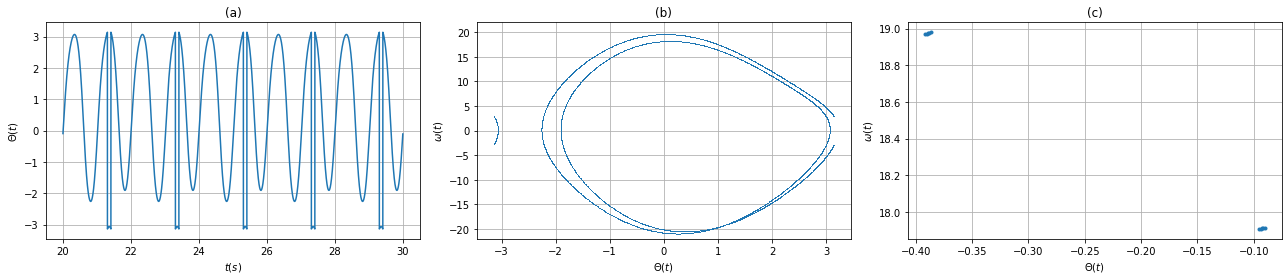

In [31]:
Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.077

import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    
    tf = 30.0

    tspan = np.linspace(0,tf,30000)
    
    
    theta0 = -np.pi/2.0
    omega0 = 0.0

    
    r0 = [theta0,omega0]    
    
    
    solveRK4 = RK4(func,r0,tspan)

    for i in range(len(solveRK4[:,0])):
        while ( solveRK4[i,0] > np.pi):
               solveRK4[i,0] = solveRK4[i,0] - (2.0*np.pi)
        while ((solveRK4[i,0]) < -np.pi):
               solveRK4[i,0] = solveRK4[i,0] + (2.0*np.pi)

    
#    fig = plt.figure(figsize=(9,5))
#    plt.plot(solveRK4[:,0],solveRK4[:,1],',')
#    plt.grid(True)
    
#    fig1 = plt.figure(figsize=(9,5))
#    plt.plot(tspan[20000:],solveRK4[20000:,0])
#    plt.xlabel('$t$ (s)')
#    plt.ylabel('$\Theta(t)$')
#    plt.grid(True)
    
#    fig2 = plt.figure(figsize=(9,5))
#    plt.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
#    plt.xlabel('$\Theta(t)$')
#    plt.ylabel('$\omega(t)$')
#    plt.xlim((-1.1*np.pi),1.1*np.pi)
#    plt.ylim(-22,22)
#    plt.grid(True)
    
    
    fig3 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
#    plt.xlim(-1,1)
#    plt.ylim(18,19)
    plt.grid(True)
    
    
    
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
    
    ax1.plot(tspan[20000:],solveRK4[20000:,0])
    ax1.set_xlabel('$t(s)$')
    ax1.set_ylabel('$\Theta(t)$')
    ax1.grid(True)
    ax1.set_title('(a)')
    
    ax2.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    ax2.set_xlabel('$\Theta(t)$')
    ax2.set_ylabel('$\omega(t)$')
    ax2.set_xlim((-1.1*np.pi),1.1*np.pi)
    ax2.set_ylim(-22,22)
    ax2.grid(True)
    ax2.set_title('(b)')
    
    ax3.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    ax3.set_xlabel('$\Theta(t)$')
    ax3.set_ylabel('$\omega(t)$')
#    ax3.set_xlim(-1,1)
#    ax3.set_ylim(18,19)
    ax3.grid(True)
    ax3.set_title('(c)')

    
    fig.tight_layout()
    plt.show()
    
    fig.savefig('Gamma_1077.pdf',bbox_inches='tight')
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): 
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

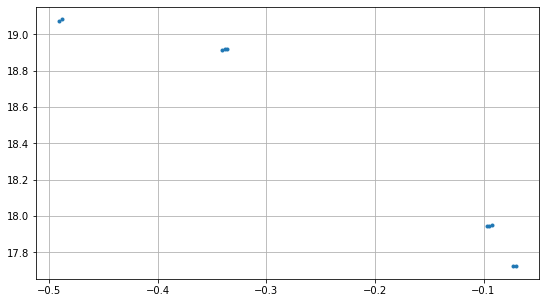

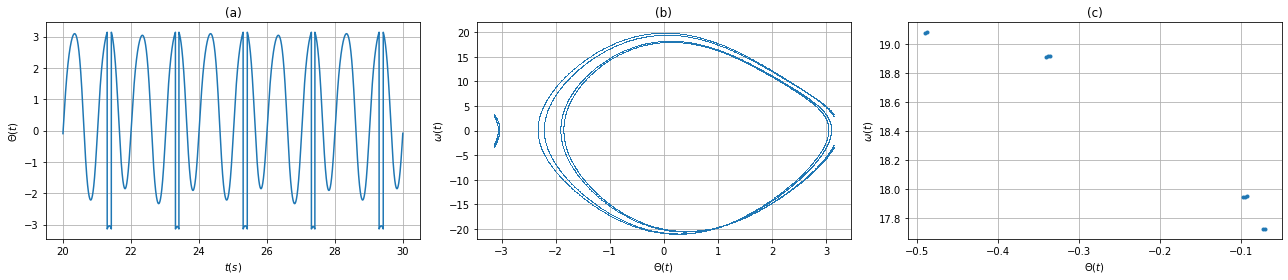

In [32]:
Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.081

import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    
    tf = 30.0

    tspan = np.linspace(0,tf,30000)
    
    
    theta0 = -np.pi/2.0
    omega0 = 0.0

    
    r0 = [theta0,omega0]    
    
    
    solveRK4 = RK4(func,r0,tspan)

    for i in range(len(solveRK4[:,0])):
        while ( solveRK4[i,0] > np.pi):
               solveRK4[i,0] = solveRK4[i,0] - (2.0*np.pi)
        while ((solveRK4[i,0]) < -np.pi):
               solveRK4[i,0] = solveRK4[i,0] + (2.0*np.pi)

    
#    fig = plt.figure(figsize=(9,5))
#    plt.plot(solveRK4[:,0],solveRK4[:,1],',')
#    plt.grid(True)
    
#    fig1 = plt.figure(figsize=(9,5))
#    plt.plot(tspan[20000:],solveRK4[20000:,0])
#    plt.xlabel('$t$ (s)')
#    plt.ylabel('$\Theta(t)$')
#    plt.grid(True)
    
#    fig2 = plt.figure(figsize=(9,5))
#    plt.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
#    plt.xlabel('$\Theta(t)$')
#    plt.ylabel('$\omega(t)$')
#    plt.xlim((-1.1*np.pi),1.1*np.pi)
#    plt.ylim(-22,22)
#    plt.grid(True)
    
    
    fig3 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    #plt.xlim(-1,1)
    #plt.ylim(18,19)
    plt.grid(True)
    
 
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
    
    ax1.plot(tspan[20000:],solveRK4[20000:,0])
    ax1.set_xlabel('$t(s)$')
    ax1.set_ylabel('$\Theta(t)$')
    ax1.grid(True)
    ax1.set_title('(a)')
    
    ax2.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    ax2.set_xlabel('$\Theta(t)$')
    ax2.set_ylabel('$\omega(t)$')
    ax2.set_xlim((-1.1*np.pi),1.1*np.pi)
    ax2.set_ylim(-22,22)
    ax2.grid(True)
    ax2.set_title('(b)')
    
    ax3.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    ax3.set_xlabel('$\Theta(t)$')
    ax3.set_ylabel('$\omega(t)$')
#    ax3.set_xlim(-1,1)
#    ax3.set_ylim(18,19)
    ax3.grid(True)
    ax3.set_title('(c)')

    
    fig.tight_layout()    


    plt.show()
    
    fig.savefig('Gamma_1081.pdf',bbox_inches='tight')
    
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): 
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

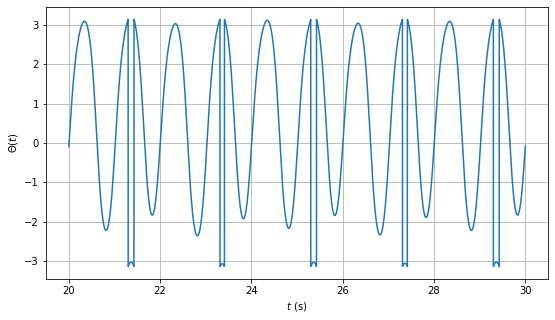

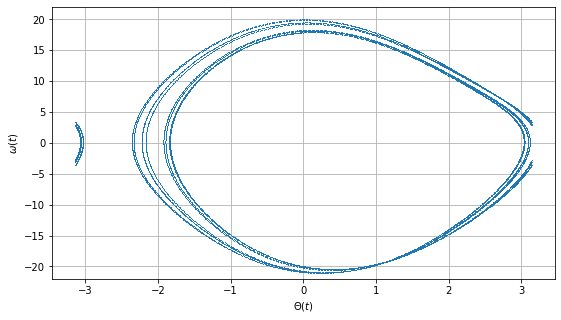

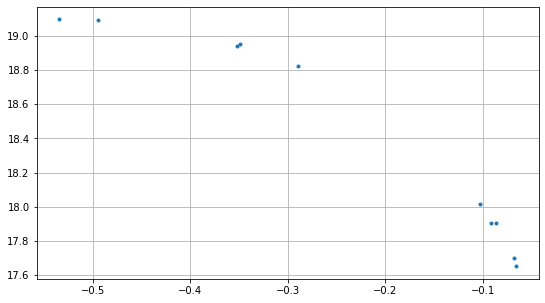

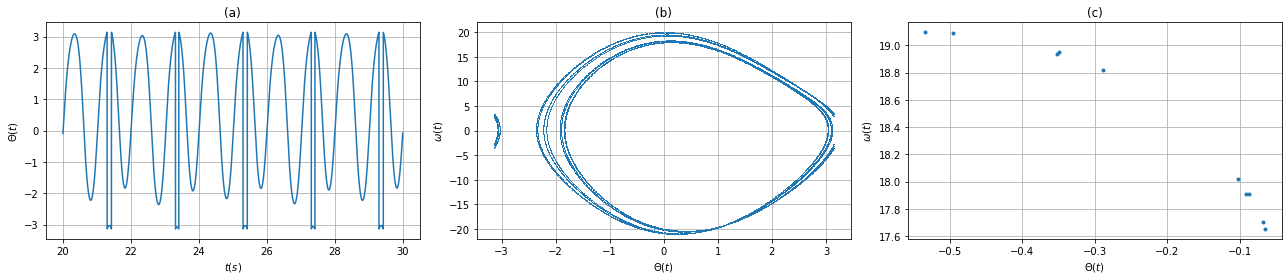

In [33]:
Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.0826

import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    
    tf = 30.0

    tspan = np.linspace(0,tf,30000)
    
    
    theta0 = -np.pi/2.0
    omega0 = 0.0

    
    r0 = [theta0,omega0]    
    
    
    solveRK4 = RK4(func,r0,tspan)

    for i in range(len(solveRK4[:,0])):
        while ( solveRK4[i,0] > np.pi):
               solveRK4[i,0] = solveRK4[i,0] - (2.0*np.pi)
        while ((solveRK4[i,0]) < -np.pi):
               solveRK4[i,0] = solveRK4[i,0] + (2.0*np.pi)

    
#    fig = plt.figure(figsize=(9,5))
#    plt.plot(solveRK4[:,0],solveRK4[:,1],',')
#    plt.grid(True)
    
    fig1 = plt.figure(figsize=(9,5))
    plt.plot(tspan[20000:],solveRK4[20000:,0])
    plt.xlabel('$t$ (s)')
    plt.ylabel('$\Theta(t)$')
    plt.grid(True)
    
    fig2 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    plt.xlabel('$\Theta(t)$')
    plt.ylabel('$\omega(t)$')
    plt.xlim((-1.1*np.pi),1.1*np.pi)
    plt.ylim(-22,22)
    plt.grid(True)
    
    
    fig3 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    #plt.xlim(-0.55,0)
    #plt.ylim(18,19)
    plt.grid(True)
    
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
    
    ax1.plot(tspan[20000:],solveRK4[20000:,0])
    ax1.set_xlabel('$t(s)$')
    ax1.set_ylabel('$\Theta(t)$')
    ax1.grid(True)
    ax1.set_title('(a)')
    
    ax2.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    ax2.set_xlabel('$\Theta(t)$')
    ax2.set_ylabel('$\omega(t)$')
    ax2.set_xlim((-1.1*np.pi),1.1*np.pi)
    ax2.set_ylim(-22,22)
    ax2.grid(True)
    ax2.set_title('(b)')
    
    ax3.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    ax3.set_xlabel('$\Theta(t)$')
    ax3.set_ylabel('$\omega(t)$')
#    ax3.set_xlim(-1,1)
#    ax3.set_ylim(18,19)
    ax3.grid(True)
    ax3.set_title('(c)')

    
    fig.tight_layout()
    plt.show()
    
    fig.savefig('Gamma_10826.pdf',bbox_inches='tight')
    
    
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): 
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

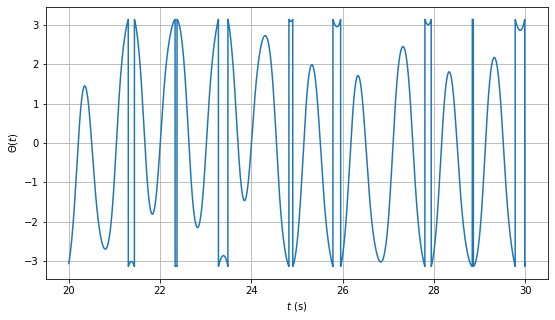

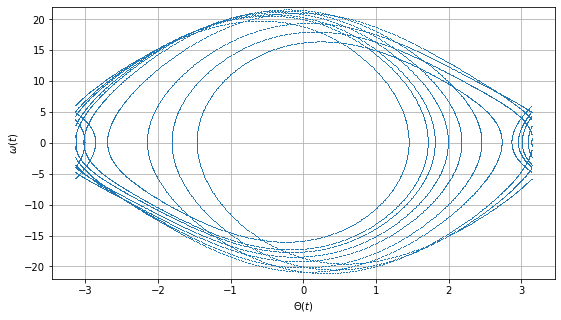

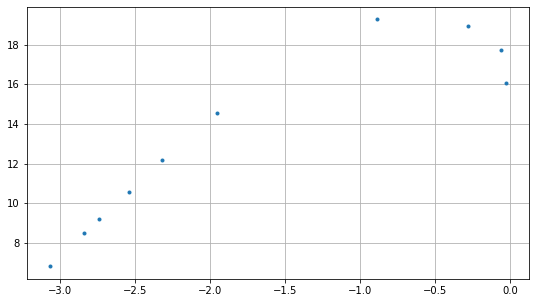

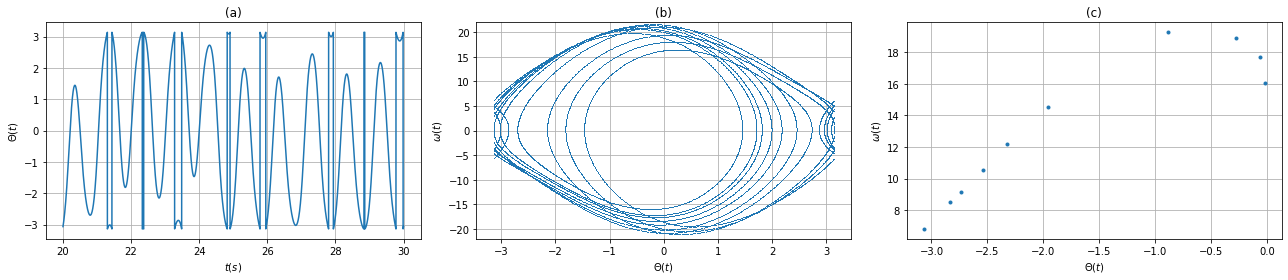

In [34]:
Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 2.0/Omega

Gamma = 1.108

import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    
    tf = 30.0

    tspan = np.linspace(0,tf,30000)
    
    
    theta0 = -np.pi/2.0
    omega0 = 0.0

    
    r0 = [theta0,omega0]    
    
    
    solveRK4 = RK4(func,r0,tspan)

    for i in range(len(solveRK4[:,0])):
        while ( solveRK4[i,0] > np.pi):
               solveRK4[i,0] = solveRK4[i,0] - (2.0*np.pi)
        while ((solveRK4[i,0]) < -np.pi):
               solveRK4[i,0] = solveRK4[i,0] + (2.0*np.pi)

    
#    fig = plt.figure(figsize=(9,5))
#    plt.plot(solveRK4[:,0],solveRK4[:,1],',')
#    plt.grid(True)
    
    fig1 = plt.figure(figsize=(9,5))
    plt.plot(tspan[20000:],solveRK4[20000:,0])
    plt.xlabel('$t$ (s)')
    plt.ylabel('$\Theta(t)$')
    plt.grid(True)
    
    fig2 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    plt.xlabel('$\Theta(t)$')
    plt.ylabel('$\omega(t)$')
    plt.xlim((-1.1*np.pi),1.1*np.pi)
    plt.ylim(-22,22)
    plt.grid(True)
    
    
    fig3 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    #plt.xlim(-1,1)
    #plt.ylim(18,19)
    plt.grid(True)
    
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
    
    ax1.plot(tspan[20000:],solveRK4[20000:,0])
    ax1.set_xlabel('$t(s)$')
    ax1.set_ylabel('$\Theta(t)$')
    ax1.grid(True)
    ax1.set_title('(a)')
    
    ax2.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    ax2.set_xlabel('$\Theta(t)$')
    ax2.set_ylabel('$\omega(t)$')
    ax2.set_xlim((-1.1*np.pi),1.1*np.pi)
    ax2.set_ylim(-22,22)
    ax2.grid(True)
    ax2.set_title('(b)')
    
    ax3.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    ax3.set_xlabel('$\Theta(t)$')
    ax3.set_ylabel('$\omega(t)$')
#    ax3.set_xlim(-1,1)
#    ax3.set_ylim(18,19)
    ax3.grid(True)
    ax3.set_title('(c)')

    
    fig.tight_layout()
    
    plt.show()
    
    fig.savefig('Gamma_1108.pdf',bbox_inches='tight')
    
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): 
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

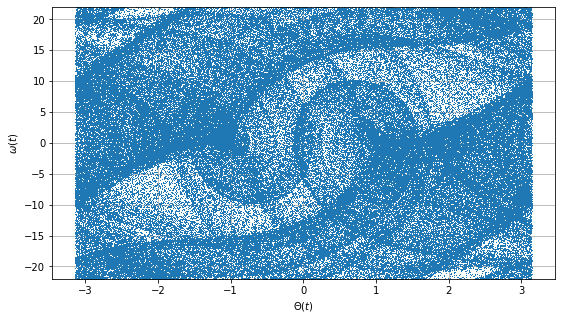

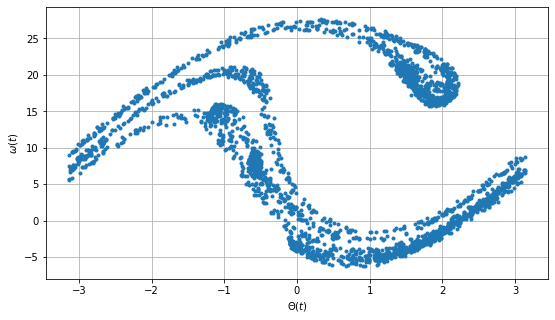

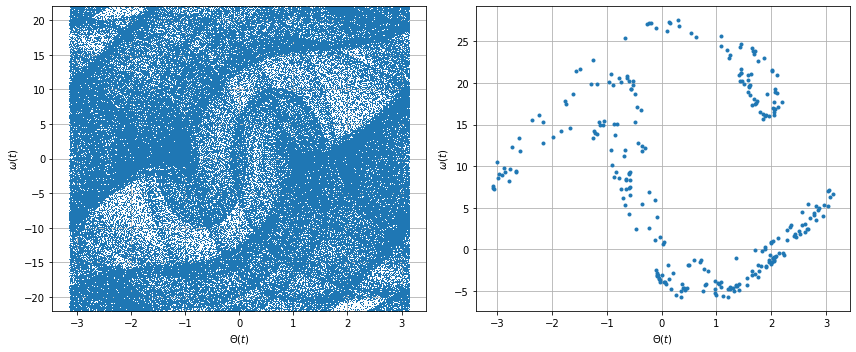

In [100]:
Omega = 3.0*np.pi
wf = 2.0*np.pi
tau = 4.0/Omega

Gamma = 1.5

import numpy as np
import matplotlib.pyplot as plt



def mainProg():
    
    
    tf = 3000.0

    tspan = np.linspace(0,tf,300000)
    
    
    theta0 = -np.pi/2.0
    omega0 = 0.0

    
    r0 = [theta0,omega0]    
    
    
    solveRK4 = RK4(func,r0,tspan)

    for i in range(len(solveRK4[:,0])):
        while ( solveRK4[i,0] > np.pi):
               solveRK4[i,0] = solveRK4[i,0] - (2.0*np.pi)
        while ((solveRK4[i,0]) < -np.pi):
               solveRK4[i,0] = solveRK4[i,0] + (2.0*np.pi)

    
#    fig = plt.figure(figsize=(9,5))
#    plt.plot(solveRK4[:,0],solveRK4[:,1],',')
#    plt.grid(True)
    
    #fig1 = plt.figure(figsize=(9,5))
    #plt.plot(tspan[20000:],solveRK4[20000:,0])
    #plt.xlabel('$t$ (s)')
    #plt.ylabel('$\Theta(t)$')
    #plt.grid(True)
    
    fig2 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[2000:,0],solveRK4[2000:,1],',',lw=0)
    plt.xlabel('$\Theta(t)$')
    plt.ylabel('$\omega(t)$')
    plt.xlim((-1.1*np.pi),1.1*np.pi)
    plt.ylim(-22,22)
    plt.grid(True)
    
    
    fig2.savefig('phaseSpacehighGamma.pdf',bbox_inches='tight')
    
    
    fig3 = plt.figure(figsize=(9,5))
    plt.plot(solveRK4[2000::100,0],solveRK4[2000::100,1],'.',lw=0)
    #plt.xlim(-1,1)
    #plt.ylim(18,19)
    plt.xlabel('$\Theta(t)$')
    plt.ylabel('$\omega(t)$')
    plt.grid(True)
    
    fig3.savefig('PoincareHighGamma.pdf',bbox_inches='tight')
    
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

    ax1.plot(solveRK4[20000:,0],solveRK4[20000:,1],',')
    ax1.set_xlabel('$\Theta(t)$')
    ax1.set_ylabel('$\omega(t)$')
    ax1.set_xlim((-1.1*np.pi),1.1*np.pi)
    ax1.set_ylim(-22,22)
    ax1.grid(True)
    
    ax2.plot(solveRK4[20000::1000,0],solveRK4[20000::1000,1],'.')
    ax2.set_xlabel('$\Theta(t)$')
    ax2.set_ylabel('$\omega(t)$')
#    ax3.set_xlim(-1,1)
#    ax3.set_ylim(18,19)
    ax2.grid(True)

    
    fig.tight_layout()
    plt.show()
    
    
    
    
def func(var,t): 
    
    theta,k = var
    
    dtheta = k
    dk = -(dtheta/tau) - (Omega**2)*np.sin(theta) + Gamma*(Omega**2)*np.cos(wf*t)
    
    return np.array([dtheta,dk])
    

    
def RK4(f,r0,t):
    dt = t[1] - t[0]
    nt = len(t) 
    ans = np.empty([nt,len(r0)])
    ans[0] = r0 
    for i in range(0, nt-1): 
        k1 = f( ans[i],t[i] )
        k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
        k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
        k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
        ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
        
    return ans    


if __name__=='__main__':
    mainProg()

<IPython.core.display.Javascript object>


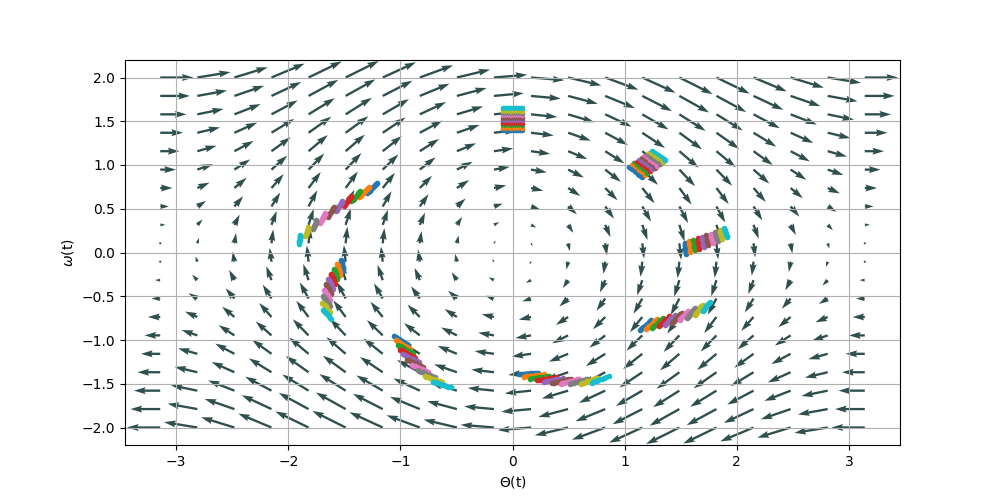

In [35]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def mainProg():
    
    theta, omega = np.meshgrid( np.linspace((-np.pi),(np.pi),20), np.linspace(-2,2,20) )
    
    thetadot = omega
    omegadot = -np.sin(theta)
    tspan = np.linspace(0,2.0*np.pi,8)
    
    theta0 = np.linspace(-(5*np.pi/180),(5*np.pi/180),10)
    omega0 = np.linspace(1.4,1.65,10)
    
    r = np.empty([100,2])
    
    n = 0
    for i in range(len(theta0)):
        for j in range(len(omega0)):
            r[n,0] = theta0[i] 
            r[n,1] = omega0[j] 
            
            n = n+1
                

    solveRK4 = RK4(func,r,tspan)
    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=8, blit=True, init_func=init)
    
    fig = plt.figure(figsize=(10,5))
    plt.quiver(theta,omega,thetadot,omegadot,color='darkslategray')
    for i in range(100):
        a = solveRK4[i]
        
        #if (np.max(abs(a[:,0])) <= 2*np.pi):
        #    plt.plot(a[:,0],a[:,1],marker='.',lw=0)
        #else:
        #    plt.plot((abs(a[:,0]))-2*np.pi,a[0:,1],marker='.',lw=0)
        
        plt.plot(a[:,0],a[:,1],'.')

    plt.grid(True)
    plt.xlabel('$\Theta$(t)')
    plt.ylabel('$\omega$(t)')
    plt.show()
    fig.savefig('Liouville1.pdf',bbox_inches='tight')
    
    
    
def func(var,t): 
    
    theta,omega = var
    dtheta = omega
    domega = -np.sin(theta)
    
    return np.array([dtheta,domega])
    
def RK4(f,z0,t):
    dt = t[1] - t[0] #step size
    nt = len(t)
    
    holdvals = [] #holding the answers 
    
    for j in range(100):
        ans = np.empty([nt,2]) #zero in first column and fill out different omega for 2nd column
        ans[0,1] = z0[j,1]
        ans[0,0] = z0[j,0]
         
        for i in range(0, nt-1):
            k1 = f( ans[i],t[i] )
            k2 = f( ans[i]+(dt/2.0)*k1, t[i] + (dt/2.0) )
            k3 = f( ans[i]+(dt/2.0)*k2, t[i] + (dt/2.0) )
            k4 = f( ans[i]+      dt*k3, t[i] + dt )
        
            ans[i+1] = ans[i] + (dt/6.0) * (k1 + 2.0*k2+ 2.0*k3 + k4)
            
        holdvals.append(ans)
    
#    print(holdvals)   
        
    return holdvals


def init():
    line.set_data([],[])
    time_text.set_text('')
    return line, time_text

def animate(i,xs,ys):
    xs = [sol[:,0,i]]
    ys = [sol[:,1,i]]
    
    line.set_data(xs,ys)
    time_text.set_text(time_template % t[i])
    
    return line, time_text




if __name__=='__main__':
    mainProg()
